### Introductiion 
Pandas - built on top of Numpy
-NumPy is great for numerical arrays,
-Pandas builds on top of NumPy to make working with tabular & labeled data easy.

Pandas is a Python library designed for data analysis and manipulation — think of it as Excel for Python, but much more powerful and programmable.

Main uses of Pandas
-Storing data in powerful structures
  -Series → 1D labeled data (like a single column in Excel)
  -DataFrame → 2D labeled data (like a table in Excel)

-Reading and writing data
  -Load data from CSV, Excel, SQL, JSON, Parquet, etc.
  -Save processed data back to these formats.

-Data cleaning & preprocessing
  -Handle missing values (NaN)
  -Rename columns, filter rows, drop duplicates
  -Change data types

-Data analysis
  -Grouping, aggregations, statistics
  -Sorting and filtering
  -Merging and joining datasets

-Time series operations
  -Resampling
  -Shifting
  -Date-based indexing

In [141]:
import pandas as pd

In [142]:
print(pd.__version__)

2.3.3


In [143]:
seriesA = pd.Series([2,3,4,5],index=['a','b','c','d'])

In [144]:
seriesA

a    2
b    3
c    4
d    5
dtype: int64

In [145]:
type(seriesA.values)

numpy.ndarray

In [146]:
seriesA.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [147]:
seriesA['a']

np.int64(2)

In [148]:
seriesA['a':'c']

a    2
b    3
c    4
dtype: int64

### Creating a dictionary

In [149]:
"""creating a dictionary"""
grades_dict = {'A':4,'A-':3.5,'B':3.0, 'B-':2.5, 'B':2.0}
grades=pd.Series(grades_dict)

marks_dict={'A':85, 'A-':80, 'B':75, 'B-':70, 'B':65}
marks =pd.Series(marks_dict)

In [150]:
grades

A     4.0
A-    3.5
B     2.0
B-    2.5
dtype: float64

In [151]:
marks

A     85
A-    80
B     65
B-    70
dtype: int64

In [152]:
marks['A']

np.int64(85)

In [153]:
marks[0:2] #slicing

A     85
A-    80
dtype: int64

In [154]:
#generating a dataframe from the defined dictionary and giving the names to the columns
marks_dataFrame= pd.DataFrame ({'Marks':marks,'Grades':grades})

In [155]:
marks_dataFrame

,Marks,Grades
A,85,4.0
A-,80,3.5
B,65,2.0
B-,70,2.5


In [156]:
marks_dataFrame.T

,A,A-,B,B-
Marks,85.0,80.0,65.0,70.0
Grades,4.0,3.5,2.0,2.5


In [157]:
marks_dataFrame.values[2,0] #extract value from 3rd row and 1 column

np.float64(65.0)

In [158]:
marks_dataFrame.columns

Index(['Marks', 'Grades'], dtype='object')

In [159]:
marks_dataFrame

,Marks,Grades
A,85,4.0
A-,80,3.5
B,65,2.0
B-,70,2.5


In [160]:
#inserting another column 
marks_dataFrame["ScaledMarks"] = 100*(marks_dataFrame["Marks"]/90)
marks_dataFrame

,Marks,Grades,ScaledMarks
A,85,4.0,94.444444
A-,80,3.5,88.888889
B,65,2.0,72.222222
B-,70,2.5,77.777778


In [161]:
del marks_dataFrame['ScaledMarks'] #deleting the column

In [162]:
marks_dataFrame

,Marks,Grades
A,85,4.0
A-,80,3.5
B,65,2.0
B-,70,2.5


In [163]:
#masking in pandas
grades_greaterthan70 = marks_dataFrame[marks_dataFrame['Marks']>70]
grades_greaterthan70

,Marks,Grades
A,85,4.0
A-,80,3.5


In [164]:
#creating a list of the dictionary
A = pd.DataFrame([{'a':1, 'b':2}, {'b':-3,'c':9}])
A
#Missing values are denoted by NaN

,a,b,c
0,1.0,2,NaN
1,NaN,-3,9.0


In [165]:
#vacant values can also be filled
A.fillna(0)

,a,b,c
0,1.0,2,0.0
1,0.0,-3,9.0


In [166]:
A.dropna #drops all the records containing missing values

<bound method DataFrame.dropna of      a  b    c
0  1.0  2  NaN
1  NaN -3  9.0>

### Pandas(Indexing) - Explicit Index, Implicit Index

In [167]:
#data[1] #explicit index, use loc instead
#data[1:3] #implicit index, use iloc instead

"""implicit or explicit depending on whether you set indices yourself or let pandas handle them
    e.g.
    s = pd.Series([10, 20, 30])
    print(s)
0    10
1    20
2    30
dtype: int64

    0, 1, 2 → implicit indices"""

'implicit or explicit depending on whether you set indices yourself or let pandas handle them\n    e.g.\n    s = pd.Series([10, 20, 30])\n    print(s)\n0    10\n1    20\n2    30\ndtype: int64\n\n    0, 1, 2 → implicit indices'

In [168]:
A = pd.Series(['a','b','c'], index=[1,3,5])

In [169]:
A[1]

'a'

In [170]:
A[1:3]

3    b
5    c
dtype: object

In [171]:
A.loc[1:3]

1    a
3    b
dtype: object

In [172]:
A.iloc[1:3]

3    b
5    c
dtype: object

In [173]:
marks_dataFrame

,Marks,Grades
A,85,4.0
A-,80,3.5
B,65,2.0
B-,70,2.5


In [174]:
marks_dataFrame.iloc[2,:] #returning the implicit index 2 values

Marks     65.0
Grades     2.0
Name: B, dtype: float64

In [175]:
marks_dataFrame.iloc[::-1,:] #reversing the order

,Marks,Grades
B-,70,2.5
B,65,2.0
A-,80,3.5
A,85,4.0


### Pandas(csv files)

In [176]:
import pandas as pd

### What is SimpleImputer?

It’s a class in scikit-learn that can automatically fill in missing values in your dataset with some strategy (mean, median, most frequent value, or a constant).

In [177]:
#used to handle missing values (NaN/null) in your dataset when working with scikit-learn.

In [178]:
df = pd.read_csv("D:/Drive_old/Python/Pyfiles/data_v7.csv")

In [179]:
df.head(10) #calliing first 6 rows

,YearWeekISO,ReportingCountry,Denominator,NumberOfIndivOneDose,Region,TargetGroup,Vaccine,Population
0,2023-09,BE,622545.0,26062.0,NaN,HCW,COMXBB,11742796
1,2023-12,BE,622545.0,1963.0,NaN,HCW,COMXBB,11742796
2,2023-11,BE,622545.0,13282.0,NaN,HCW,COMXBB,11742796
3,2023-10,BE,622545.0,83069.0,NaN,HCW,COMXBB,11742796
4,2023-09,BE,622545.0,1785.0,NaN,HCW,OTHER,11742796
5,2024-03,BE,622545.0,16.0,NaN,HCW,COMXBB,11742796
6,2023-12,BE,622545.0,49.0,NaN,HCW,OTHER,11742796
7,2024-02,BE,622545.0,66.0,NaN,HCW,COMXBB,11742796
8,2024-03,BE,622545.0,1.0,NaN,HCW,OTHER,11742796
9,2023-11,BE,622545.0,392.0,NaN,HCW,OTHER,11742796


In [180]:
#deleting the columns
df.drop(['YearWeekISO', 'ReportingCountry'], axis=1,inplace=False)
"""In pandas, axis tells pandas whether to work across rows or across columns:
axis=0 → operate on rows (index axis)
axis=1 → operate on columns (column axis)

inplace parameter
inplace=False (default) → returns a new DataFrame without modifying the original.
inplace=True → modifies the existing DataFrame in place (doesn’t return anything).
"""

'In pandas, axis tells pandas whether to work across rows or across columns:\naxis=0 → operate on rows (index axis)\naxis=1 → operate on columns (column axis)\n\ninplace parameter\ninplace=False (default) → returns a new DataFrame without modifying the original.\ninplace=True → modifies the existing DataFrame in place (doesn’t return anything).\n'

In [181]:
df.rename(columns={'Denominator':'Denom,', 'Region':'Reg'})

,YearWeekISO,ReportingCountry,"Denom,",NumberOfIndivOneDose,Reg,TargetGroup,Vaccine,Population
0,2023-09,BE,622545.0,26062.0,NaN,HCW,COMXBB,11742796
1,2023-12,BE,622545.0,1963.0,NaN,HCW,COMXBB,11742796
2,2023-11,BE,622545.0,13282.0,NaN,HCW,COMXBB,11742796
3,2023-10,BE,622545.0,83069.0,NaN,HCW,COMXBB,11742796
4,2023-09,BE,622545.0,1785.0,NaN,HCW,OTHER,11742796
...,...,...,...,...,...,...,...,...
9342,2023-12,SK,NaN,2201.0,NaN,ALL,COMXBB,5428792
9343,2023-11,SK,NaN,12908.0,NaN,ALL,COMXBB,5428792
9344,2023-10,SK,NaN,16.0,NaN,ALL,NVXDXBB,5428792
9345,2023-09,SK,NaN,1327.0,NaN,ALL,COMXBB,5428792


In [182]:
df.head()

,YearWeekISO,ReportingCountry,Denominator,NumberOfIndivOneDose,Region,TargetGroup,Vaccine,Population
0,2023-09,BE,622545.0,26062.0,NaN,HCW,COMXBB,11742796
1,2023-12,BE,622545.0,1963.0,NaN,HCW,COMXBB,11742796
2,2023-11,BE,622545.0,13282.0,NaN,HCW,COMXBB,11742796
3,2023-10,BE,622545.0,83069.0,NaN,HCW,COMXBB,11742796
4,2023-09,BE,622545.0,1785.0,NaN,HCW,OTHER,11742796


In [183]:
df['WeekYear'] = pd.to_datetime(df['YearWeekISO']).dt.strftime('%V-%G')
#converting the Yearweek to week year format

In [184]:
df.head()

,YearWeekISO,ReportingCountry,Denominator,NumberOfIndivOneDose,Region,TargetGroup,Vaccine,Population,WeekYear
0,2023-09,BE,622545.0,26062.0,NaN,HCW,COMXBB,11742796,35-2023
1,2023-12,BE,622545.0,1963.0,NaN,HCW,COMXBB,11742796,48-2023
2,2023-11,BE,622545.0,13282.0,NaN,HCW,COMXBB,11742796,44-2023
3,2023-10,BE,622545.0,83069.0,NaN,HCW,COMXBB,11742796,39-2023
4,2023-09,BE,622545.0,1785.0,NaN,HCW,OTHER,11742796,35-2023


In [185]:
df.describe()

,Denominator,NumberOfIndivOneDose,Population
count,2.316000e+03,9.178000e+03,9.347000e+03
mean,1.961417e+06,1.013884e+04,9.227050e+06
std,6.002915e+06,9.638045e+04,1.215367e+07
min,1.831000e+03,0.000000e+00,3.967700e+04
25%,1.528830e+05,0.000000e+00,5.563970e+06
50%,4.600880e+05,0.000000e+00,5.563970e+06
75%,1.238716e+06,3.800000e+01,1.041398e+07
max,7.010712e+07,3.002831e+06,8.435884e+07


In [186]:
df.info

<bound method DataFrame.info of      YearWeekISO ReportingCountry  Denominator  NumberOfIndivOneDose Region  \
0        2023-09               BE     622545.0               26062.0    NaN   
1        2023-12               BE     622545.0                1963.0    NaN   
2        2023-11               BE     622545.0               13282.0    NaN   
3        2023-10               BE     622545.0               83069.0    NaN   
4        2023-09               BE     622545.0                1785.0    NaN   
...          ...              ...          ...                   ...    ...   
9342     2023-12               SK          NaN                2201.0    NaN   
9343     2023-11               SK          NaN               12908.0    NaN   
9344     2023-10               SK          NaN                  16.0    NaN   
9345     2023-09               SK          NaN                1327.0    NaN   
9346     2023-10               SK          NaN                9887.0    NaN   

     TargetGroup  V

In [187]:
df.fillna('NA')

,YearWeekISO,ReportingCountry,Denominator,NumberOfIndivOneDose,Region,TargetGroup,Vaccine,Population,WeekYear
0,2023-09,BE,622545.0,26062.0,NA,HCW,COMXBB,11742796,35-2023
1,2023-12,BE,622545.0,1963.0,NA,HCW,COMXBB,11742796,48-2023
2,2023-11,BE,622545.0,13282.0,NA,HCW,COMXBB,11742796,44-2023
3,2023-10,BE,622545.0,83069.0,NA,HCW,COMXBB,11742796,39-2023
4,2023-09,BE,622545.0,1785.0,NA,HCW,OTHER,11742796,35-2023
...,...,...,...,...,...,...,...,...,...
9342,2023-12,SK,NA,2201.0,NA,ALL,COMXBB,5428792,48-2023
9343,2023-11,SK,NA,12908.0,NA,ALL,COMXBB,5428792,44-2023
9344,2023-10,SK,NA,16.0,NA,ALL,NVXDXBB,5428792,39-2023
9345,2023-09,SK,NA,1327.0,NA,ALL,COMXBB,5428792,35-2023


In [188]:
df.info

<bound method DataFrame.info of      YearWeekISO ReportingCountry  Denominator  NumberOfIndivOneDose Region  \
0        2023-09               BE     622545.0               26062.0    NaN   
1        2023-12               BE     622545.0                1963.0    NaN   
2        2023-11               BE     622545.0               13282.0    NaN   
3        2023-10               BE     622545.0               83069.0    NaN   
4        2023-09               BE     622545.0                1785.0    NaN   
...          ...              ...          ...                   ...    ...   
9342     2023-12               SK          NaN                2201.0    NaN   
9343     2023-11               SK          NaN               12908.0    NaN   
9344     2023-10               SK          NaN                  16.0    NaN   
9345     2023-09               SK          NaN                1327.0    NaN   
9346     2023-10               SK          NaN                9887.0    NaN   

     TargetGroup  V

In [189]:
df.head(20)

,YearWeekISO,ReportingCountry,Denominator,NumberOfIndivOneDose,Region,TargetGroup,Vaccine,Population,WeekYear
0,2023-09,BE,622545.0,26062.0,NaN,HCW,COMXBB,11742796,35-2023
1,2023-12,BE,622545.0,1963.0,NaN,HCW,COMXBB,11742796,48-2023
2,2023-11,BE,622545.0,13282.0,NaN,HCW,COMXBB,11742796,44-2023
3,2023-10,BE,622545.0,83069.0,NaN,HCW,COMXBB,11742796,39-2023
4,2023-09,BE,622545.0,1785.0,NaN,HCW,OTHER,11742796,35-2023
5,2024-03,BE,622545.0,16.0,NaN,HCW,COMXBB,11742796,09-2024
6,2023-12,BE,622545.0,49.0,NaN,HCW,OTHER,11742796,48-2023
7,2024-02,BE,622545.0,66.0,NaN,HCW,COMXBB,11742796,05-2024
8,2024-03,BE,622545.0,1.0,NaN,HCW,OTHER,11742796,09-2024
9,2023-11,BE,622545.0,392.0,NaN,HCW,OTHER,11742796,44-2023


In [190]:
df['NumberOfIndivOneDose'] = pd.to_numeric(df['NumberOfIndivOneDose'], errors='coerce')
#convert first into numeric data
df2=df.groupby('ReportingCountry')[['NumberOfIndivOneDose', 'Population']].sum().reset_index() 
#sum() function works for only numeric vaues

In [191]:
df2

,ReportingCountry,NumberOfIndivOneDose,Population
0,BE,4914042.0,986394864
1,BG,102914.0,348176340
2,CY,18069.0,103118512
3,CZ,1044504.0,2403711438
4,DE,8299759.0,1181023830
5,DK,2161423.0,207642890
6,EE,99342.0,47805940
7,EL,898585.0,3280404330
8,ES,19104442.0,9520901478
9,FI,7692767.0,33650890560


In [192]:
df3=df2[df2['NumberOfIndivOneDose']<100000]

In [193]:
df3

,ReportingCountry,NumberOfIndivOneDose,Population
2,CY,18069.0,103118512
6,EE,99342.0,47805940
11,HU,47449.0,527985920
13,IS,60707.0,27143060
15,LI,2023.0,3213837
16,LT,51898.0,54288301
17,LU,35282.0,35022877
18,MT,3125.0,52036896
23,RO,1645.0,304872768
25,SI,66623.0,105848600


In [194]:
countries = df3['ReportingCountry'].unique()
#df3['ReportingCountry'] ==> extracts the ReportingCountry column from the dataFrame df3.
#.unique(), returns all the unique (non-duplicate) values in that column, as a NumPy array.
len(countries)

11

In [195]:
import numpy as np

In [196]:
import matplotlib.pyplot as plt

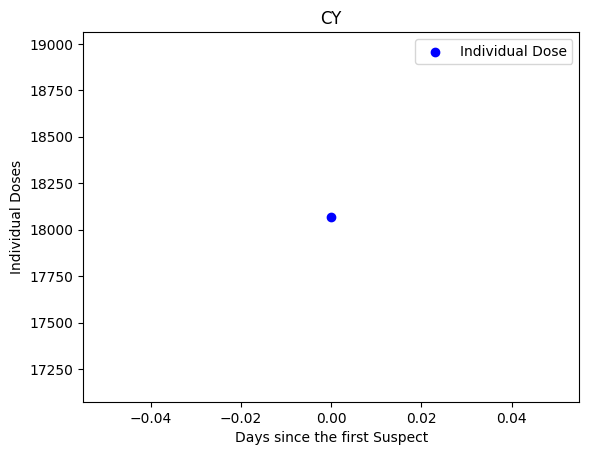

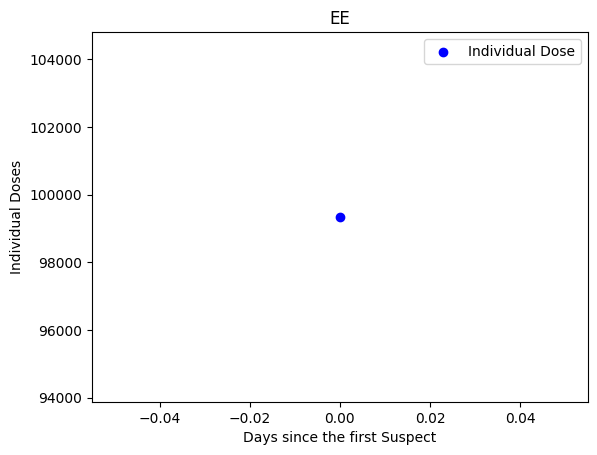

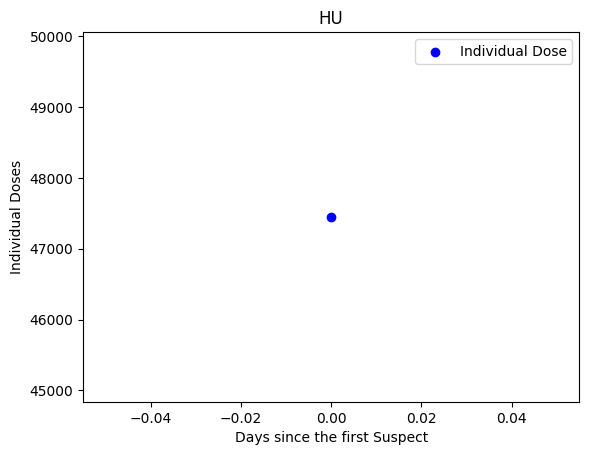

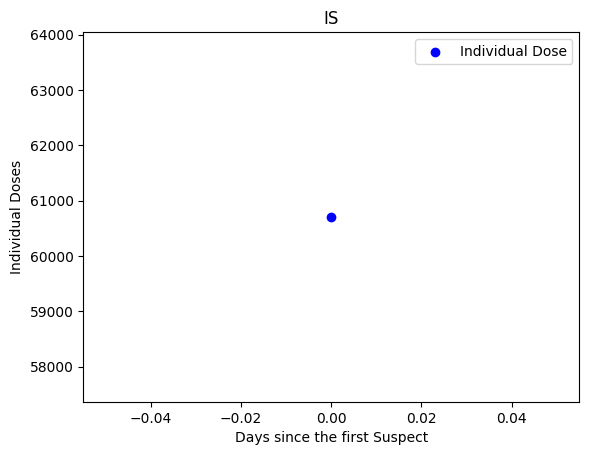

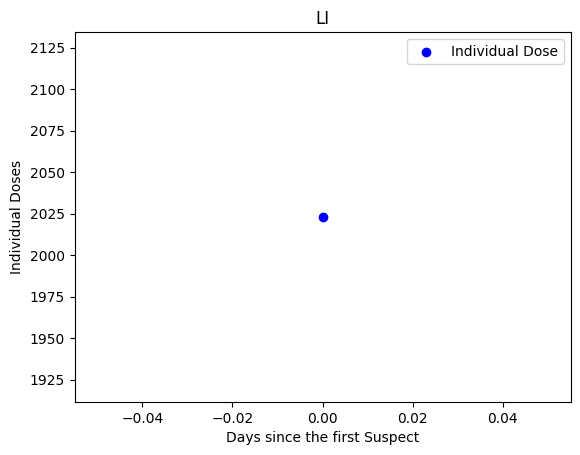

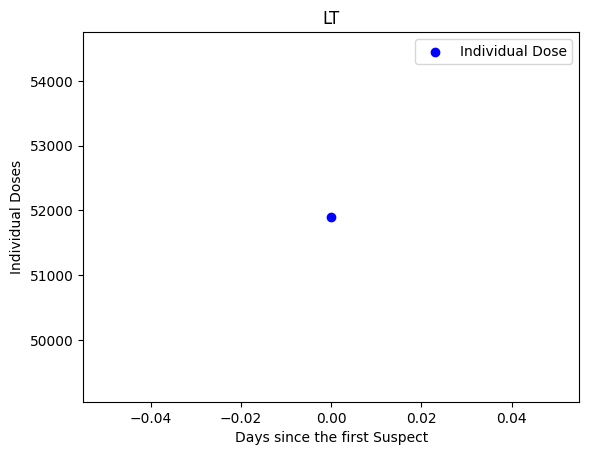

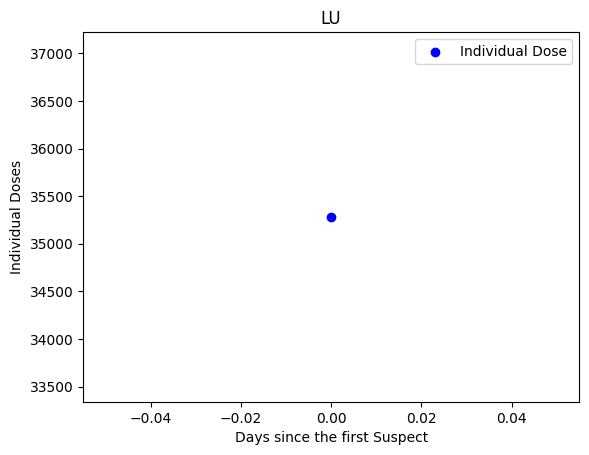

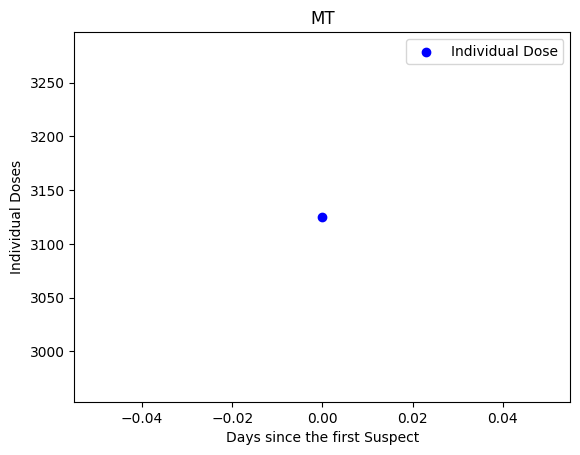

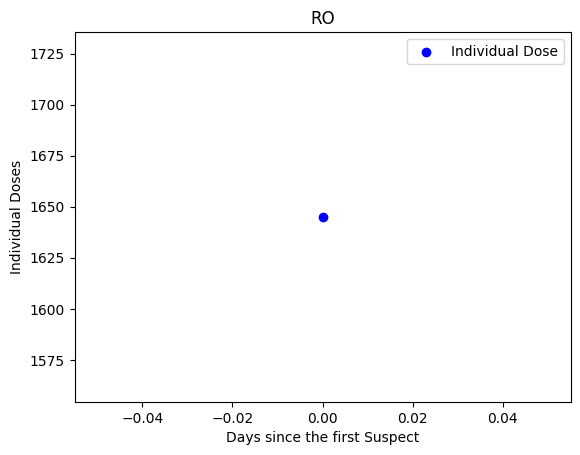

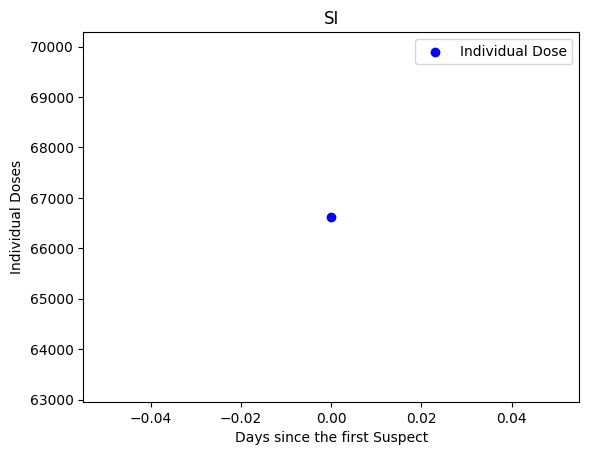

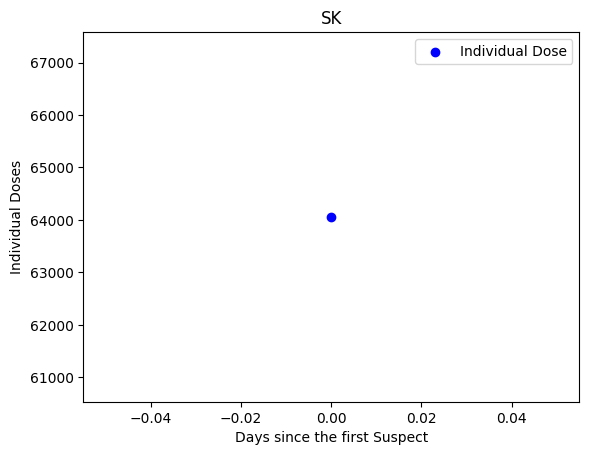

In [197]:
for idx in range(0,len(countries)):
    C = df3[df3['ReportingCountry']==countries[idx]].reset_index() 
    #countries[idx] → picks one country from your countries list.
    #df3['ReportingCountry']==countries[idx] → creates a boolean mask (True for rows where the country matches, False otherwise).
    #df3[...] → selects only the rows where that condition is True, gives you a subset of df3 for just one country
    #reset_index() renumbers the index starting from 0 → [0, 1, 2].
    plt.scatter(np.arange(0,len(C)), C['NumberOfIndivOneDose'], color='blue', label='Individual Dose')
    plt.title(countries[idx])
    plt.xlabel('Days since the first Suspect')
    plt.ylabel('Individual Doses')
    plt.legend()
    plt.show()